Source declaration:
- The construction of the affine coupling layers aswell as the idea for the moons experiment to thes the normalizing flow is insired and taken in part from Brennan Gebotys, https://gebob19.github.io/normalizing-flows/, last accessed on January 18, 2024. 
- The idea and general structure of the code for the linear regression experiment is by __[[Diaz Baso et. al., 2022]](https://www.aanda.org/articles/aa/full_html/2022/03/aa42018-21/aa42018-21.html)__.

# Affine coupling layer normalizing flow

## 1. Explanation and definition of an affine coupling layer normalizing flow

### 1.1 Affine coupling layer normalizing flow: Explanation

#### 1.1.1 Conceptual formulation of a normalizing flow

Consider some vector $\boldsymbol{x} \in \mathbb{R}^d$ with $d,\,q \in \mathbb{N}$ and a latent vector $\boldsymbol{z} \in \mathbb{R}^d$. The probability densities for these vectors shall be given by 
$$
\boldsymbol{x} \sim p_{\boldsymbol{x}}(\boldsymbol{x}), \quad \boldsymbol{z}\sim p_{\boldsymbol{z}}(\boldsymbol{z}) = \mathcal{N}(0,1)^d.
$$

The aim of a normalizing flow is to learn a diffeomorphism 
$$
\boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}:\mathbb{R}^d \rightarrow \mathbb{R}^d, \quad \boldsymbol{x} \mapsto \boldsymbol{z} = \boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}(\boldsymbol{x})
$$
transforming the probability density function $p_{\boldsymbol{x}}$ to $p_{\boldsymbol{z}}$. The conceptual principle of a normalizing flow is visualized in the following figure. 
<center>
<figure>
<img src="normflow.png" style="width:40%">
<figcaption align = "center"> 
<small>
<b> Figure 1:</b>
Visualization of the working principle for a normalizing flow without conditioning data.
</small>
</figcaption>
</figure>
</center>

Hereby, $\boldsymbol{\phi}(\hat{\mathbf{x}})$ are weights depending on training data $\hat{\mathbf{x}} \in \mathbb{R}^{d\times q}$, which are associated to a deep neural network implementing the diffeomorphic function $\boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}$. Given such a function, using the change of variable formula the probability density $p_{\boldsymbol{x}}(\boldsymbol{x})$ can be calculated as 
$$
p_{\boldsymbol{x}}(\boldsymbol{x}) = p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}(\boldsymbol{x})]\left|\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right|.
$$
Knowing the transformation $\boldsymbol{z} = \boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}(\boldsymbol{x})$ and given that $\boldsymbol{z} \sim \mathcal{N}(0,1)^d$, one can easily calculate samples from the distribution $p_{\boldsymbol{x}}(\boldsymbol{x})$ by means of sampling $\boldsymbol{z}$ from a $d$-dimensional standard normal distribution and obtaining the corresponding $\boldsymbol{x}$ plugging $\boldsymbol{z}$ into the inverse function $\boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}^{-1}$, such that $\boldsymbol{x} = \boldsymbol{f}_{\boldsymbol{\phi}(\hat{\mathbf{x}})}^{-1}(\boldsymbol{z})$.

#### 1.1.2 Normalizing flow with conditioning data

Consider a model $\boldsymbol{M}(\boldsymbol{x}) = \boldsymbol{y}$, that produces observations $\boldsymbol{y} \in \mathbb{R}^D,\,D \in \mathbb{N}$ based on model parameters $\boldsymbol{x}\in\mathbb{R}^d,\,d,\,q \in \mathbb{N}$. Furthermore, consider a latent vector $\boldsymbol{z} \in \mathbb{R}^d$. The probability densities for these vectors are given by 
$$
\boldsymbol{x} \sim p_{\boldsymbol{x}}(\boldsymbol{x}), \quad \boldsymbol{y} \sim p_{\boldsymbol{y}}(\boldsymbol{y}), \quad \boldsymbol{z}\sim p_{\boldsymbol{z}}(\boldsymbol{z}) = \mathcal{N}(0,1)^d.
$$

The aim of the normalizing flow is to model the probability density $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$, namely the probability density function of $\boldsymbol{x}$, given a certain observation $\boldsymbol{y}$, thereby defining an inversion of the model $\boldsymbol{M}(\boldsymbol{x}) = \boldsymbol{y}$, see \cref{fig:normflowconditional} for a visualization of a normalizing flow with conditioning data; which from now on will be called a conditional normalizing flow.

<center>
<figure>
<img src="normflowconditional.png" style="width:40%">
<figcaption align = "center"> 
<small>
<b> Figure 2:</b>
Visualization of the working principle for a normalizing flow with conditioning data.
</small>
</figcaption>
</figure>
</center>

The multidimensional quantity $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$ is a set of parameters learned by a neural network, which is used to implement the normalizing flow.

If there is no conditioning data $\boldsymbol{y}$ available, the normalizing flow can directly be applied to learn the probability distribution $p_{\boldsymbol{\phi}(\hat{\mathbf{x}})}(\boldsymbol{x})$ based on standard normally distributed data $z \sim p_{\boldsymbol{z}}(\boldsymbol{z}) = \mathcal{N}(0,1)^d$. In this case, the conditioning data $\boldsymbol{y}$, i.e. the symbols $\boldsymbol{y}$ and $\hat{\mathbf{y}}$, can be omitted in all formulae pertaining to the current chapter of this document.

#### 1.1.3 Coupling layer normalizing flow

Consider a diffeomorphism 
$$
\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}: \mathbb{R}^d \rightarrow \mathbb{R}^d, \quad \boldsymbol{x} \mapsto \boldsymbol{z} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}),
$$ 
where $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$ are weights depending on training data $\hat{\mathbf{x}} \in \mathbb{R}^{d\times q}$ and $\hat{\mathbf{y}} \in \mathbb{R}^{D \times q}$, which are associated to a deep neural network implementing the diffeomorphic function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}}, \hat{\mathbf{y}})}$. The probability density for $\boldsymbol{x}$ as calculated via $\boldsymbol{x}= \boldsymbol{f}^{-1}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{z})$ therefore becomes conditional on the context $\boldsymbol{y}$, because the network parameters $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$ themselves depend on the context $\hat{\mathbf{y}}$ used to train the network. Hence for $p_{\boldsymbol{x}}(\boldsymbol{x})$, the notation $p_{\boldsymbol{x}}(\boldsymbol{x}) = p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ is introduced.

With the change of variable theorem, one obtains 
$$
1 = \int_{\mathbb{R}^d} p_{\boldsymbol{z}}(\boldsymbol{z})\,\mathrm{d}\boldsymbol{z} = \int_{\mathbb{R}^d}p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\left|\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right|\,\mathrm{d}\boldsymbol{x} \\ = \int_{\mathbb{R}^d} p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})\,\mathrm{d}\boldsymbol{x},
$$ 
from which it follows, that the probability density $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ can be expressed by means of the diffeomorphism $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$, the Jacobian $\tfrac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}$ and the probability density $p_{\boldsymbol{z}}(\boldsymbol{z})$, namely 
$$
p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y}) = p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\left|\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right|.
$$ 
This identity is to be considered as the key to implementing a loss function for the normalizing flow technique.

Since a concatenation of diffeomorphisms is again a diffeomorphism, the function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$ can be composed of many diffeomorphisms. Let $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(1)}, \dots, \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},n}$ with $n \in \mathbb{N}$ be a number of diffeomorphisms, such that 
$$
\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(n)}\circ \dots \circ \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(1)}.
$$ 
Introducing the notation $\boldsymbol{x} \doteq \boldsymbol{z}_{(0)}$, $\boldsymbol{z} \doteq \boldsymbol{z}_{(n)}$ and $\boldsymbol{z}_{(k)} \doteq \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})$ with $k \in \{1,\dots,n\}$, the function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$ can be written as 
$$
\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{z}_{(0)}) = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(n)}\circ \dots\circ \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(1)}(\boldsymbol{z}_{(0)}).
$$ 
In the following figure, an overview of the working principle of a coupling layer normalizing flow is visualized.

<center>
<figure>
<img src="normflows.png" style="width:40%">
<figcaption align = "center"> 
<small>
<b> Figure 3:</b>
Visualization of the working principle of coupling layer normalizing flows.
</small>
</figcaption>
</figure>
</center>

Because $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})$ is a concatenation of functions $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})$ with $k \in \{1,\dots,n\}$, the determinant of the Jacobian  for $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})$ with respect to $\boldsymbol{x}$ is given by 
$$
\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right) = \prod_{k=1}^{n}\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}\right),
$$ 
where the Jacobians on the right-hand side take the form 
$$
\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}} = 
\begin{pmatrix}
\frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),1}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),1}}  \dots  \frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),1}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),d}} \\
\vdots  \ddots  \vdots \\
\frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),d}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),1}}  \dots  \frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),d}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),d}}
\end{pmatrix}
$$ 
with $k \in \{1,\dots,n\}$. 
Every function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})$ for $k \in \{1,\dots,n\}$ represents one of the $n$ so-called coupling layers constituting the total flow function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$. Every composite function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}$ is implemented by application of neural networks depending on $\boldsymbol{x}$ and $\boldsymbol{y}$, such that each composite function is fully invertible and differentiable. The total set of parameters learned by the neural networks is then identified with $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$, hence defining the function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$.

#### 1.1.4 Construction of an affine coupling layer normalizingf flow

Consider a diffeomorphism 
$$\ 
\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(n)}\circ \dots \circ \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(1)}: \mathbb{R}^d \rightarrow \mathbb{R}^d, \quad \boldsymbol{x} \mapsto \boldsymbol{z} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}),
$$ 
where all quantities are given as defined as before. 

In the case of $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}$ being so-called affine coupling layers, the functions can explicitly written by means of two arbitrary functions 
$$
\boldsymbol{\mu}_{(k)}: \mathbb{R}^{m+D} \rightarrow \mathbb{R}^{d-m}, \quad \boldsymbol{\sigma}_{(k)}: \mathbb{R}^{m+D} \rightarrow \mathbb{R}^{d-m}
$$ 
with $m \in \{1,\dots,d\}$ and $k \in \{1,\dots,n\}$ implemented as deep neural networks. That is to say, that the neural networks $\boldsymbol{\mu}_{(k)}$ and $\boldsymbol{\sigma}_{(k)}$ take a vector of dimension $m+D$ as an input and return a vector of dimension $d-m$ as an output; there can be an arbitrary sequence of network layers and activation functions in between input and output. Every mapping $\boldsymbol{z}_{(k)} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})$ for $k \in \{1,\dots,n\}$ is now defined as an affine transformation, such that 
$$
f_{\boldsymbol{y},\boldsymbol{\phi},(k),l}(\boldsymbol{z}_{(k-1)}) = z_{(k-1),l}, \\
f_{\boldsymbol{y},\boldsymbol{\phi},(k-1),l}^{-1}(\boldsymbol{z}_{(k)}) = 
z_{(k),l}
$$ 
for $l \in \{1,\dots,m\}$
and
$$
f_{\boldsymbol{y},\boldsymbol{\phi},(k),l}(\boldsymbol{z}_{(k-1)}) = 
\mu_{(k),l}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y}) + e^{\sigma_{(k),l}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})}\cdot z_{(k-1),l}, \\
f_{\boldsymbol{y},\boldsymbol{\phi},(k-1),l}^{-1}(\boldsymbol{z}_{(k)}) = [z_{(k),l} - \mu_{(k),l}(\boldsymbol{z}_{(k),1:m},\boldsymbol{y})]\cdot  e^{-\sigma_{(k),l}(\boldsymbol{z}_{(k),1:m},\boldsymbol{y})}
$$ 
for $l \in \{m+1,\dots,d\}$, where $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)} = (f_{\boldsymbol{y},\boldsymbol{\phi},(k),1},\dots,f_{\boldsymbol{y},\boldsymbol{\phi},(k),d})^\top$ and $\boldsymbol{z}_{(k),1:m} = (z_{(k),1},\dots, z_{(k),m})^\top$.

It is a convenient property of such affine functions $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})$ for $k \in \{1,\dots,n\}$, that the Jacobians with respect to $\boldsymbol{z}_{(k-1)}$ are triangular, that is 
$$
\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}} = 
\begin{pmatrix}
\mathbf{E}_m  \mathbf{0}_m \\
\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k),m+1:d}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1),m+1:d}}   \mathrm{diag}\left(e^{\sigma_{(k),m+1:d}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})}\right)
\end{pmatrix},
$$ 
where $\mathbf{E}_m$ is a unity matrix and $\mathbf{0}_m$ is a zero matrix of dimension $m \times m$. The lower left quantity in the above matrix is again a Jacobian and takes the form 
$$
\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k),m+1:d}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1),m+1:d}} = \begin{pmatrix}
\frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),m+1}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),m+1}}  \dots  \frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),m+1}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),d}} \\
\vdots  \ddots  \vdots \\
\frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),d}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),m+1}}  \dots  \frac{\partial f_{\boldsymbol{y},\boldsymbol{\phi},(k),d}(\boldsymbol{z}_{(k-1)})}{\partial z_{(k-1),d}} \end{pmatrix},
$$
the lower right quantity however is a diagonal matrix with the elements $e^{\sigma_{(k),l}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})}$ for $l \in \{m+1,d\}$ on the diagonal. Therefore, the Jacobian $\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}$ is triangular and hence its determinant is given by the product of the diagonal elements, that is 
$$
\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}\right) = \prod_{j = m+1}^{d}e^{\sigma_{(k),j}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})}.
$$ 
Taking the logarithm of this expression results in a transformation of the product to a sum, such that 
$$
\log\left[\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}\right)\right] = \sum_{j = m+1}^{d}\sigma_{(k),j}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})
$$ 
holds. Recall, that the complete normalizing flow is given as a concatenation of affine coupling functions (layers), such that 
$$
\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right) = \prod_{k = 1}^{n}\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}\right).
$$
Taking the logarithm of this expression and inserting the previous result, this leads to 
$$
\log\left[\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right] = \sum_{k = 1}^{n}\log\left[\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi},(k)}(\boldsymbol{z}_{(k-1)})}{\partial \boldsymbol{z}_{(k-1)}}\right)\right] \\
= \sum_{k = 1}^{n}\sum_{j = m+1}^{d}\sigma_{(k),j}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y}).
$$

#### 1.1.5 Training process for an affine coupling layer normalizing flow

Recalling the diffeomorphism $\boldsymbol{z} = \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})$ and the change of variable formula for the multivariate case, the probability density $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ can be written as 
$$
p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y}) = p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\left|\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right|.
$$
Taking the natural logarithm of this expression and making use of the last obtained identity from the previous subsection, one obtains
$$
\log\left[p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})\right] = \log\left(p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\right) \\ \quad + \left|\sum_{k = 1}^{n}\sum_{j = m+1}^{d}\sigma_{(k),j}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})\right|.
$$ 
Note, that the natural logarithm $\log(a)$ is strictly monotonic increasing for $a > 0$; furthermore, $-\infty < \log(a) \leq 0$ for $ 0 < a \leq 1$. Therefore, maximizing the so-called likelihood $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ is equivalent to maximizing $\log\left[p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})\right]$, which is named the log-likelihood. Maximizing $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ corresponds to finding optimal network parameters $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$ for the deep neural networks $\boldsymbol{\mu}_{(k)}$ and $\boldsymbol{\sigma}_{(k)}$ for $k \in\{1,\dots,n\}$ constituting the flow function $\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}$, such that the most suitable model parameters $\boldsymbol{x}$ given some context $\boldsymbol{y}$ are found. In the case of a stellar atmosphere inversion, $p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})$ represents a probability distribution for the solutions $\boldsymbol{x}$ of an inversion $\boldsymbol{x} = \boldsymbol{M}^{-1}(\boldsymbol{y})$, where $\boldsymbol{M}$ is the atmosphere model and $\boldsymbol{y}$ are observations.

That is to say, that the normalizing flow, i.e. the neural networks constituting it, are trained by means of minimizing the negative log-likelihood $-\log\left[p_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x}|\boldsymbol{y})\right]$, which is equivalent to maximizing positive log-likelihood and hence also to maximizing the positive likelihood. Therefore, the loss function to minimize by any gradient-descent and backpropagation algorithm employed can be defined as 
$$
\mathcal{L}_{\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x},\boldsymbol{y}) =  -\log\left(p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\right) - \log\left(\left|\det\left(\frac{\partial \boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})}{\partial \boldsymbol{x}}\right)\right|\right) \\
= -\log\left(p_{\boldsymbol{z}}[\boldsymbol{f}_{\boldsymbol{y},\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})}(\boldsymbol{x})]\right) - \left|\sum_{k = 1}^{n}\sum_{j = m+1}^{d}\sigma_{(k),j}(\boldsymbol{z}_{(k-1),1:m},\boldsymbol{y})\right|.
$$ 
This loss function is minimized with respect to the neural network parameters $\boldsymbol{\phi}(\hat{\mathbf{x}},\hat{\mathbf{y}})$.


### 1.2 Affine coupling layer normalizing flow: Implementation

#### 1.2.1 Import all necessary packages

In [1]:
# Import all important packages and set parameters
from __future__ import division
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm, amsmath, siunitx}'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14
import torch
import torch.nn as nn
import numpy as np
from math import pi 
import seaborn as sns
import pandas as pd
import corner
import emcee
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions import LogisticNormal
from torch.utils.data import TensorDataset, Dataset, DataLoader
from sklearn.model_selection import train_test_split
from utils import *

#### 1.2.2 Fix seeds, such that experiments are reproducible

In [2]:
# Fix seeds for reproducibility purposes
torch.manual_seed(2)
np.random.seed(2)

#### 1.2.3 Define the affine coupling layer

In [3]:
# Define coupling layer (affine coupling type)
class CouplingLayer(nn.Module):
    def __init__(self, input_size, hidden_size, context_size=None):
        """
        Initializes the affine coupling layer.

        input_size: Size (dimension) of the input, which is to be transformed to a base distribution (standard normal distribution).
        hidden_size: Size (dimension) of the hidden layers of the neural networks involved in the transformations.
        """
        # Initialize object
        super().__init__()

        # Assign variables to coupling layer input
        self.D, self.d, self.m, self.h = context_size, input_size, int(input_size/2), hidden_size

        # Decide on size of neural network input
        if context_size is not None:
            self.net_in = self.m + self.D
        else:
            self.net_in = self.m

        # Define neural network implementing the shift parameter mu of an affine function: f(x) = sig*x + mu
        self.sig_net = nn.Sequential(
                    nn.Linear(self.net_in, self.h),
                    nn.LeakyReLU(),
                    nn.Linear(self.h, (self.d-self.m)))

        # Define neural network implementing the scale parameter sigma of an affine function: f(x) = sig*x + mu
        self.mu_net = nn.Sequential(
                    nn.Linear(self.net_in, self.h),
                    nn.LeakyReLU(),
                    nn.Linear(self.h, (self.d-self.m)))

    def forward(self, x, context=None, flip=False, inverse=False):
        """
        Defines the forward and inverse direction of the coupling layer.

        x: Input, which is to be transformed to a base distribution (standard normal distribution).
        context: Context, on which the input data is conditioned.
        flip: Default is False; if True, input is split into two and flipped after every coupling layer.
        inverse: Default is False; if True, the inverse direction of the normalizing flow is active.
        """
        # Split input into two parts
        x1, x2 = torch.split(x, [self.m, self.d - self.m], dim=1)

        # Flip the two parts, if flip is True
        if flip:
            x1, x2 = torch.split(x, [self.d - self.m, self.m], dim=1)
            x2, x1 = x1, x2

        # If there is context, concatenate it with one part of the input to feed to the neural networks
        if context is not None:
            xy = torch.cat([x1, context], dim=-1)
        else:
            xy = x1

        # Instantiate and calculate neural networks for the scale and shift parameters sig and mu
        mu = self.mu_net(xy)
        sig = self.sig_net(xy)

        # Calculate forward transformation, if inverse=False
        if not inverse:
            z1, z2 = x1, mu + x2 * torch.exp(sig)

        # Calculate inverse transformation, if inverse=True
        else:
            z1, z2 = x1, (x2 - mu) * torch.exp(-sig)

        # Again flip the data, if flip is True
        if flip:
            z2, z1 = z1, z2 

        # Concatenate unprocessed and processed input to an output tensor
        z = torch.cat([z1, z2], dim=-1)

        # Calculate log-likelihood
        pz = MultivariateNormal(torch.zeros(x.shape[1]), torch.eye(x.shape[1]))
        log_pz = pz.log_prob(z)
 
        # Calculate determinant of log-likelihood
        log_det_J = sig.sum(-1)

        # Return output tensor, log-likelihood and determinant of log-likelihood
        return z, log_pz, log_det_J

#### 1.2.4 Define the affine coupling layer normalizing flow architecture

In [4]:
# Define normalizing flow (RNVP type)
class NormalizingFlow(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, context_size=None):
        """
        Initializes the normalizing flow architecture

        input_size: Size (dimension) of the input, which is to be transformed to a base distribution (standard normal distribution).
        hidden_size: Size (dimension) of the context, on which the input data is conditioned.
        num_layers: Integer defining the total coupling layer number of the normalizing flow.
        context_size: Size (dimension) of the context, on which the input is conditioned.
        """
        # Initializes object
        super().__init__()

        # Create a list of coupling layers with specified characteristics
        self.bijectors = nn.ModuleList([
            CouplingLayer(input_size, hidden_size, context_size) for _ in range(num_layers)
        ])

        # Create a list of alternating flip values for all coupling layers of the transformation
        self.flips = [True if i%2 else False for i in range(num_layers)]

        # Make input_size accessible to other classes
        self.input_size = input_size
        
    def forward(self, x, context=None, inverse=False):
        """
        Defines the forward and inverse direction of the normalizing flow

        x: Input, which is to be transformed to a base distribution (standard normal distribution).
        context: Context, on which the input data is conditioned.
        flip: Default is False; if True, input is split into two and flipped after every coupling layer.
        inverse: Default is False; if True, the inverse direction of the normalizing flow is active.
        """
        # Define empty list to store log-likelihoods and determinants of log-likelihoods
        lg_pz = []
        lg_det_J = []

        # Calculate resulting log-likelihoods and determinants thereof in forward direction
        if not inverse:
            for biijector, f in zip(self.bijectors, self.flips):
                x, lpz, ldj = biijector(x, context=context, inverse=False, flip=f)
                lg_pz.append(lpz)
                lg_det_J.append(ldj)

        # Calculate resulting log-likelihoods and determinants thereof in inverse direction
        else:
            for biijector, f in zip(reversed(self.bijectors), reversed(self.flips)):
                x, lpz, ldj = biijector(x, context=context, inverse=True, flip=f)
                lg_pz.append(lpz)
                lg_det_J.append(ldj)
                
        # Return processed input, the total log-likelihood and the determinant of the total log-likelihood
        return x, sum(lg_pz), sum(lg_det_J)


#### 1.2.5 Define training and sampling utilities for the normalizing flow

In [5]:
# Define a loss and training class
class NormalizingFlowUtilities:
    def __init__(self, model, optimizer=torch.optim.Adam, learning_rate=1e-3, epochs=10, scheduler=torch.optim.lr_scheduler.ExponentialLR, scheduling_rate=0.999, batch_size=512, savename=None):
        """
        Initializes utilities of a normalizing flow class.

        model: Normalizing flow model.
        optimizer: Optimizer type, default is the ADAM optimizer.OptimizerPostHook
        learning_rate: Learning rate for trianing, default is 0.001.
        epochs: Number of epochs, default is 10.
        scheduler: Scheduler type, default is exponential scheduler.
        scheduling_rate: Scheduling rate for training, default is 0.999.
        batch_size: Batch size for batch feeding to the training loop, default is 512.
        savename: Saving name for plot of train/test curve, default is None, which means that it is not saved.
        """
        # Initializes object
        super().__init__()

        # Make model parameters accessible for other functions
        self.model = model
        self.optimizer = optimizer(self.model.parameters(), lr=learning_rate)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.scheduler = scheduler(self.optimizer, scheduling_rate)
        self.scheduling_rate = scheduling_rate
        self.batch_size = batch_size
        self.savename = savename
        
    def loss_function(self, x, context=None, inverse=False):
        """
        Implements the negative log-likelihood of the posterior as loss function, where the change of
        variable theorem of probability calculus is applied.

        x: Input, which is to be transformed to a base distribution (standard normal distribution).
        context: Context, on which the input data is conditioned.
        """
        # Calculate loss
        z, log_pz, log_det_J = self.model(x, context=context, inverse=inverse)

        # Calculate mean of the loss and return
        loss = -torch.mean(log_pz + log_det_J)
        return loss

    
    def training(self, x, context=None, savename=None, frac_ticks=1):
        """
        Calling this function with appropriate parameters and inputs trains the normalizing flow.

        x: Input, which is to be transformed to a base distribution (standard normal distribution).
        context: Context, on which the input data is conditioned.
        savename: Name for the plot of the loss curve, if it shall be saved to the current directory.
        frac_ticks: Fraction of ticks to be shown in loss curve plot. Default is 1, meaning that all ticks will
                    be shown. A lower number, e.g. 0.7 means, that only 7 in 10 ticks will be shown.
        """
        # Train flow for case with context
        if context is not None:
            # Make training and testing splits
            x_train, x_test, y_train, y_test = train_test_split(x, context, test_size=0.2, random_state=42)

            # Standardize the input x and context y for training dataset
            x_scaler_train = StandardScaler().fit(x_train)
            y_scaler_train = StandardScaler().fit(y_train)
            x_std_train = x_scaler_train.transform(x_train)
            y_std_train = y_scaler_train.transform(y_train)

            # Standardize the input x and context y for testing dataset
            x_scaler_test = StandardScaler().fit(x_test)
            y_scaler_test = StandardScaler().fit(y_test)
            x_std_test = x_scaler_test.transform(x_test)
            y_std_test = y_scaler_test.transform(y_test)

            # Define base distribution z, such that z = f(x) for training dataset
            z_train = MultivariateNormal(torch.zeros(x_std_train.shape[1]), torch.eye(x_std_train.shape[1])).rsample(sample_shape=(x_std_train.shape[0],)).detach().numpy()

            # Define base distribution z, such that z = f(x) for testing dataset
            z_test = MultivariateNormal(torch.zeros(x_std_test.shape[1]), torch.eye(x_std_test.shape[1])).rsample(sample_shape=(x_std_test.shape[0],)).detach().numpy()

            # Convert training data to PyTorch tensors
            x_std_train = torch.tensor(x_std_train, dtype=torch.float32)
            y_std_train = torch.tensor(y_std_train, dtype=torch.float32)
            z_train = torch.tensor(z_train, dtype=torch.float32)

            # Convert testing data to PyTorch tensors
            x_std_test = torch.tensor(x_std_test, dtype=torch.float32)
            y_std_test = torch.tensor(y_std_test, dtype=torch.float32) 
            z_test = torch.tensor(z_test, dtype=torch.float32) 

            dataset_train = torch.utils.data.TensorDataset(x_std_train, y_std_train)
            dataset_test = torch.utils.data.TensorDataset(x_std_test, y_std_test)
            dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=self.batch_size, shuffle=True)
            dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=self.batch_size, shuffle=True)

            # Train the flow for case with context
            train_losses = []
            test_losses = []
            epochs = []
            for epoch in range(self.epochs):
                epoch_train_losses = []
                epoch_test_losses = []
                for batch_x, batch_y in dataloader_train:
                    self.model.train()
                    self.optimizer.zero_grad()
                    L = self.loss_function(batch_x, context=batch_y)
                    L.backward()
                    self.optimizer.step()
                    self.scheduler.step()
                    epoch_train_losses.append(L.detach())
                for batch_x, batch_y in dataloader_test:
                    self.model.eval()
                    L = self.loss_function(batch_x, context=batch_y)
                    epoch_test_losses.append(L.detach())
                epoch_train_loss = sum(epoch_train_losses)/len(dataset_train)
                epoch_test_loss = sum(epoch_test_losses)/len(dataset_test)
                train_losses.append(epoch_train_loss)
                test_losses.append(epoch_test_loss)
                epochs.append(epoch)
                if (epoch+1) % 1 == 0:
                    print('Epoch {}/{} train loss: {:.4f}'.format(epoch+1, self.epochs, epoch_train_loss))
                    print('Epoch {}/{} test loss: {:.4f}'.format(epoch+1, self.epochs, epoch_test_loss))

            # Make scalers available to other methods of class
            self.input_scaler = x_scaler_test
            self.context_scaler = y_scaler_test

        # Train flow for case without context
        if context is None:
            # Make training and testing splits
            x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)

            # Standardize the input x for training dataset
            x_scaler_train = StandardScaler().fit(x_train)
            x_std_train = x_scaler_train.transform(x_train)

            # Standardize the input x for testing dataset
            x_scaler_test = StandardScaler().fit(x_test)
            x_std_test = x_scaler_test.transform(x_test)

            # Define base distribution z, such that z = f(x) for training dataset
            z_train = MultivariateNormal(torch.zeros(x_std_train.shape[1]), torch.eye(x_std_train.shape[1])).rsample(sample_shape=(x_std_train.shape[0],)).detach().numpy()

            # Define base distribution z, such that z = f(x) for testing dataset
            z_test = MultivariateNormal(torch.zeros(x_std_test.shape[1]), torch.eye(x_std_test.shape[1])).rsample(sample_shape=(x_std_test.shape[0],)).detach().numpy()

            # Convert training data to PyTorch tensors
            x_std_train = torch.tensor(x_std_train, dtype=torch.float32)
            z_train = torch.tensor(z_train, dtype=torch.float32)

            # Convert testing data to PyTorch tensors
            x_std_test = torch.tensor(x_std_test, dtype=torch.float32)
            z_test = torch.tensor(z_test, dtype=torch.float32) 

            dataset_train = torch.utils.data.TensorDataset(x_std_train)
            dataset_test = torch.utils.data.TensorDataset(x_std_test)
            dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=self.batch_size, shuffle=True)
            dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=self.batch_size, shuffle=True)

            # Train the flow for case without context
            train_losses = []
            test_losses = []
            epochs = []
            for epoch in range(self.epochs):
                epoch_train_losses = []
                epoch_test_losses = []
                for batch_x in dataloader_train:
                    self.model.train()
                    self.optimizer.zero_grad()
                    L = self.loss_function(batch_x[0])
                    L.backward()
                    self.optimizer.step()
                    self.scheduler.step()
                    epoch_train_losses.append(L.detach())
                for batch_x in dataloader_test:
                    self.model.eval()
                    L = self.loss_function(batch_x[0])
                    epoch_test_losses.append(L.detach())
                epoch_train_loss = sum(epoch_train_losses)/len(dataset_train)
                epoch_test_loss = sum(epoch_test_losses)/len(dataset_test)
                train_losses.append(epoch_train_loss)
                test_losses.append(epoch_test_loss)
                epochs.append(epoch)
                if (epoch+1) % 1 == 0:
                    print('Epoch {}/{} train loss: {:.4f}'.format(epoch+1, self.epochs, epoch_train_loss))
                    print('Epoch {}/{} test loss: {:.4f}'.format(epoch+1, self.epochs, epoch_test_loss))

            # Make scalers available to other methods of class
            self.input_scaler = x_scaler_test

        # Plot training results
        plt.figure(figsize=(7,4))
        plt.title('Train and test losses')
        plt.xlabel('Epoch')
        plt.ylabel('Loss $\\mathcal{L}$')
        x_ticks = np.array(epochs) + 1
        ticks_param = int(1/frac_ticks)
        selected_ticks = np.array(epochs)[::ticks_param]
        plt.xticks(selected_ticks, x_ticks[selected_ticks])
        plt.plot(np.array(epochs), train_losses, label='Train loss')
        plt.plot(np.array(epochs), test_losses, label='Test loss')
        plt.legend(loc='best')
        plt.tight_layout()
        if self.savename != None:
            plt.savefig(self.savename)
        plt.show()

    def sample(self, sample_num=1000, input=None, context=None, inverse=True):
        """
        Sample from the normalizing flow "model", given samples z from a standard normal distribution. Returns both the samples from the
        used standard normal distribution z_sample aswell as the calculated samples from the posterior x_sample.

        sample_num: Number of samples to generate from the normalizing flow.
        input: Input data to calculate latent density for.
        context: Single vector (tensor) of data to calculate posterior density based on.
        inverse: Determines, which way the normalizing flow is applied to. If inverse=True, one goes from a standard normally distributed
                 sample to the target density. Default is True, but if it is False, one goes from the target density to a standard normal
                 distribution.
        """
        # Define samples from standard normal distribution
        z_sample = MultivariateNormal(torch.zeros(self.model.input_size), torch.eye(self.model.input_size)).rsample(sample_shape=(sample_num,))

        # Calculate output x_sample based on no context
        if context is None and inverse is True:
            # Calculate samples from the posterior
            x_sample_std, _, _ = self.model(z_sample, inverse=inverse)
            x_sample = self.input_scaler.inverse_transform(x_sample_std.detach().numpy())
            
            # Return sampled values from the posterior
            return x_sample, z_sample
        
        # Calculate output x_sample based on context
        if context is not None and inverse is True:
            # Calculate scaled context
            y_sample = torch.tensor(np.repeat(context[None,:], z_sample.shape[0], axis=0))
            y_sample_std = torch.tensor(self.context_scaler.transform(y_sample), dtype=torch.float32)

            # Calculate samples from the posterior
            x_sample_std, _, _ = self.model(z_sample, context=y_sample_std, inverse=inverse)
            x_sample = self.input_scaler.inverse_transform(x_sample_std.detach().numpy())

            # Return sampled values from the posterior
            return x_sample, z_sample
        
        # Calculate latent density based on no context
        if context is None and inverse is False:
            # Calculate scaled input and latent density
            x_sample_std = torch.tensor(self.input_scaler.transform(input), dtype=torch.float32)

            z_latent, _, _ = self.model(x_sample_std, inverse=inverse)
            z_latent = z_latent.detach().numpy()

            return z_latent
        
        # Calculate latent density based on context
        if context is not None and inverse is False:
            # Calculate scaled input, scaled context and latent density
            x_sample_std = torch.tensor(self.input_scaler.transform(input), dtype=torch.float32)
            y_sample = torch.tensor(np.repeat(context[None,:], z_sample.shape[0], axis=0))
            y_sample_std = torch.tensor(self.context_scaler.transform(y_sample), dtype=torch.float32)

            z_latent, _, _ = self.model(x_sample_std, context=y_sample_std, inverse=inverse)
            z_latent = z_latent.detach().numpy()

            return z_latent

## 2. Applications

### 2.1 Application example 1 (without context): Moons dataset

#### 2.1.1 Instantiate normalizing flow and train it

Epoch 1/25 train loss: 0.0411
Epoch 1/25 test loss: 0.0400
Epoch 2/25 train loss: 0.0397
Epoch 2/25 test loss: 0.0412
Epoch 3/25 train loss: 0.0389
Epoch 3/25 test loss: 0.0390
Epoch 4/25 train loss: 0.0393
Epoch 4/25 test loss: 0.0391
Epoch 5/25 train loss: 0.0382
Epoch 5/25 test loss: 0.0387
Epoch 6/25 train loss: 0.0380
Epoch 6/25 test loss: 0.0391
Epoch 7/25 train loss: 0.0380
Epoch 7/25 test loss: 0.0386
Epoch 8/25 train loss: 0.0379
Epoch 8/25 test loss: 0.0385
Epoch 9/25 train loss: 0.0377
Epoch 9/25 test loss: 0.0388
Epoch 10/25 train loss: 0.0377
Epoch 10/25 test loss: 0.0385
Epoch 11/25 train loss: 0.0377
Epoch 11/25 test loss: 0.0384
Epoch 12/25 train loss: 0.0376
Epoch 12/25 test loss: 0.0384
Epoch 13/25 train loss: 0.0376
Epoch 13/25 test loss: 0.0384
Epoch 14/25 train loss: 0.0375
Epoch 14/25 test loss: 0.0383
Epoch 15/25 train loss: 0.0375
Epoch 15/25 test loss: 0.0382
Epoch 16/25 train loss: 0.0375
Epoch 16/25 test loss: 0.0383
Epoch 17/25 train loss: 0.0375
Epoch 17/25

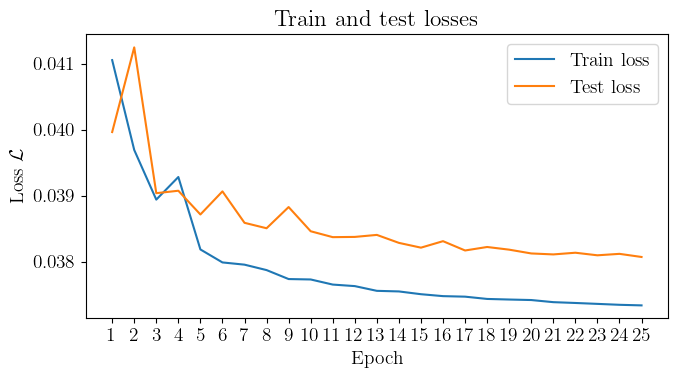

In [6]:
# Define data to train and test on
x, _ = datasets.make_moons(n_samples=100000, noise=0.05)

# Instantiate normalizing flow class
moons_flow = NormalizingFlow(input_size=x.shape[1], hidden_size=512, num_layers=10, context_size=None)

# Instantiate normalizing flow utilities class
moons_flow_utils = NormalizingFlowUtilities(moons_flow, epochs=25, batch_size=512)

# Train the model
moons_flow_utils.training(x, savename='appl_ex1_moons_loss.pdf')

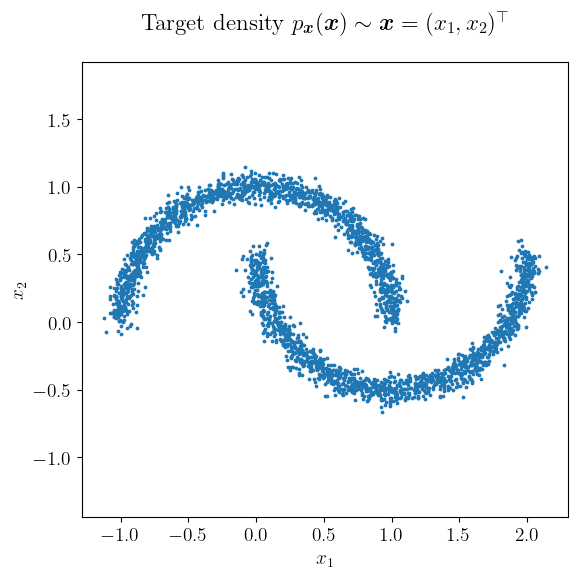

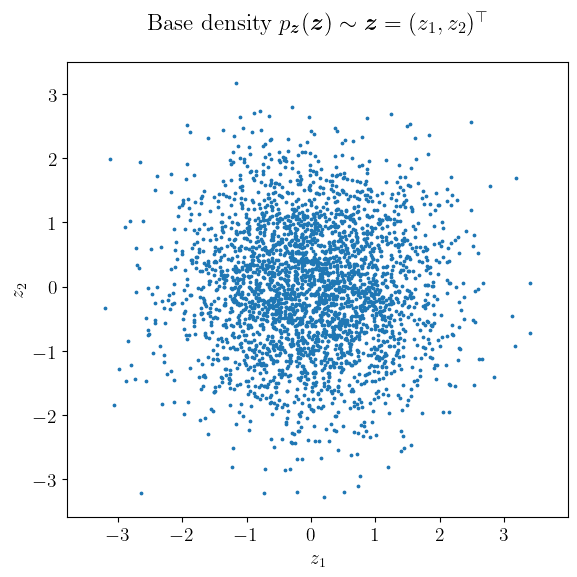

In [7]:
# Plot base and target densities
target_dens = datasets.make_moons(n_samples=3000, noise=0.05)[0]
base_dens = MultivariateNormal(torch.zeros(2), torch.eye(2)).rsample(sample_shape=(3000,))

# Plot target density
plt.figure(figsize=(6,6))
plt.title('Target density $p_{\\bm{x}}(\\bm{x}) \\sim \\bm{x} =(x_1,x_2)^\\top$\n')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.scatter(target_dens[:,0], target_dens[:,1], s=3)
plt.tight_layout()
plt.savefig('appl_ex1_moons_target-dens.pdf')

# Plot base density
plt.figure(figsize=(6,6))
plt.title('Base density $p_{\\bm{z}}(\\bm{z}) \\sim \\bm{z} = (z_1,z_2)^\\top$\n')
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')
plt.axis('equal')
plt.scatter(base_dens[:,0], base_dens[:,1], s=3)
plt.tight_layout()
plt.savefig('appl_ex1_moons_base-dens.pdf')

#### 2.1.2 Test the trained normalizing flow

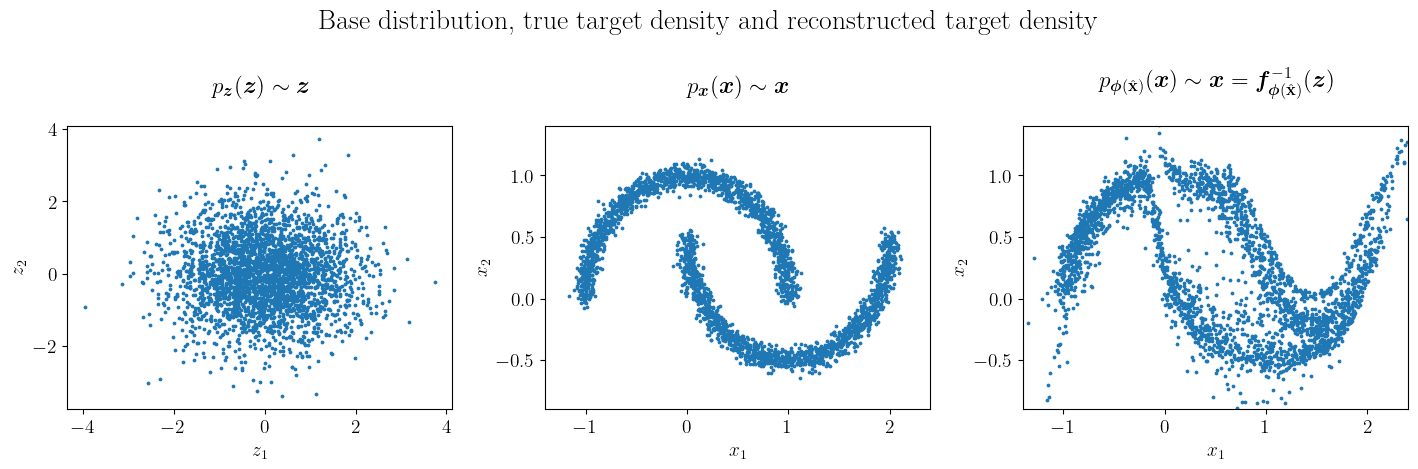

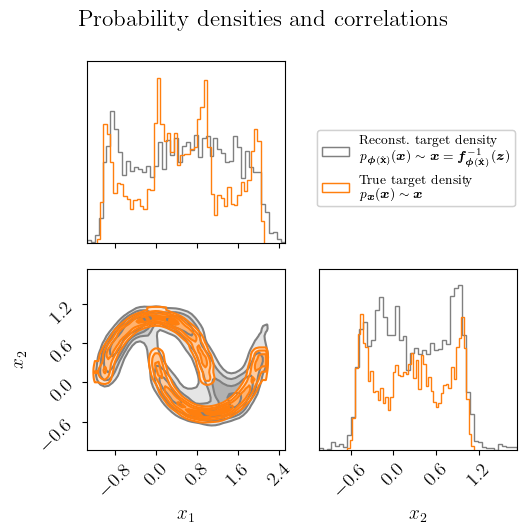

In [8]:
# Sample from the posterior
numsamples = 3000
rec_x, z = moons_flow_utils.sample(sample_num=numsamples)
x, _ = datasets.make_moons(n_samples=numsamples, noise=0.05)

# Filter outliers for plotting purposes
rec_x_filtered = filter_outliers(rec_x, iqr_multiplier=1.3)

# Set scatter plot point size
ps = int(3)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(1/3))
plt.suptitle('Base distribution, true target density and reconstructed target density', fontsize=20)
axes[0].scatter(z[:, 0], z[:, 1], s=ps)
axes[0].set_title('$p_{\\bm{z}}(\\bm{z}) \\sim \\bm{z}$\n')
axes[0].set_xlabel('$z_1$')
axes[0].set_ylabel('$z_2$')
#axes[0].set_aspect('equal')
axes[1].scatter(x[:, 0], x[:, 1], s=ps)
axes[1].set_title('$p_{\\bm{x}}(\\bm{x}) \\sim \\bm{x}$\n')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')
axes[1].set_xlim(-1.4, 2.4)
axes[1].set_ylim(-0.9, 1.4)
#axes[1].set_aspect('equal')
axes[2].scatter(rec_x[:, 0], rec_x[:, 1], s=ps)
axes[2].set_title('$p_{\\bm{\phi}(\\hat{\\mathbf{x}})}(\\bm{x}) \\sim \\bm{x} = \\bm{f}^{-1}_{\\bm{\phi}(\\hat{\\mathbf{x}})}(\\bm{z})$\n')
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')
axes[2].set_xlim(-1.4, 2.4)
axes[2].set_ylim(-0.9, 1.4)
#axes[2].set_aspect('equal')
plt.tight_layout()
plt.savefig('appl_ex1_moons_results_1.pdf')

# Calculate weights for plotting
weights_true = np.ones_like(rec_x_filtered[:,0])/len(rec_x_filtered[:,0])
weights_reconstructed = np.ones_like(x[:,0])/len(x[:,0])

# Make corner plot
figure = corner.corner(rec_x_filtered, labels=['$x_1$', '$x_2$'], show_titles=False, color='Gray', plot_datapoints=False, fill_contours=True, bins=50, smooth=1.5, weights=weights_true)
_ = corner.corner(x, labels=['$x_1$', '$x_2$'], show_titles=False, color='C1', plot_datapoints=False, fill_contours=True, bins=50, smooth=1.5, weights=weights_reconstructed, fig=figure)
plt.suptitle('Probability densities and correlations')
legend = plt.legend(['Reconst. target density\n$p_{\\bm{\phi}(\\hat{\\mathbf{x}})}(\\bm{x}) \\sim \\bm{x} = \\bm{f}^{-1}_{\\bm{\phi}(\\hat{\\mathbf{x}})}(\\bm{z})$', 'True target density\n$p_{\\bm{x}}(\\bm{x}) \\sim \\bm{x}$'], loc='upper right', bbox_to_anchor=(1.02, 1.80), handlelength=2.0, fontsize=9.5)
plt.gca().add_artist(legend)
plt.tight_layout()
plt.savefig('appl_ex1_moons_results_2.pdf')
plt.show()

### 2.2 Application example 2 (with context): Linear regression

#### 2.2.1 Define the training and testing data

Shape of lines: (250000, 10)
Shape of values: (250000, 2)


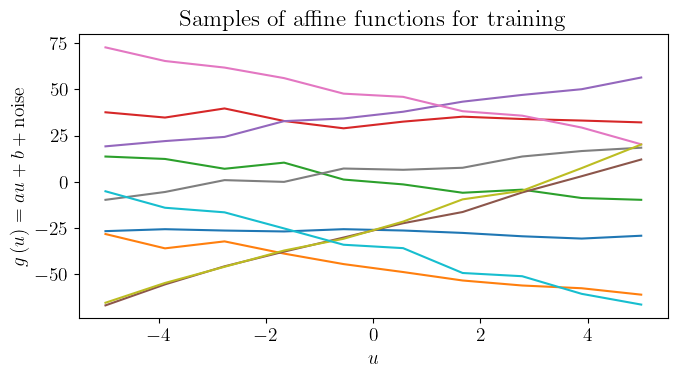

In [9]:
# Define the linear model
def linear_model(eval_arr, slope, intercept, noise):
    'Create data for linear model'
    output = slope*eval_arr + intercept + np.random.normal(0, noise, size=eval_arr.shape[0])
    return output.astype(dtype=np.float32)

# Sample slope parameters a and intercept parameters b of a linear model uniformly
samp_data = 500
a = np.random.uniform(-10, 10, samp_data) # Parameter a of g(u) = a*u + b (slope)
b = np.random.uniform(-50, 50, samp_data) # Parameter b of g(u) = a*u + b (intercept)
u = np.linspace(-5, 5, 10) # Evaluation points of the linear function  g(u) = a*u + b
noise = 2 # Try 0.5

# Calculate dataset containing lines of linear functions and associated parameters
lines = np.zeros((a.shape[0]*b.shape[0], u.shape[0]), dtype=np.float32)
values = np.zeros((a.shape[0]*b.shape[0], 2), dtype=np.float32)
cont = 0
for i_a in a:
    for i_b in b:
        lines[cont,:] = linear_model(u, i_a, i_b, noise)
        values[cont,0] = i_a;  values[cont,1] = i_b; 
        cont = cont + 1

# Print shapes of lines and values
print('Shape of lines:', lines.shape) # Lines are g(u) values of a linear graph with noise for u = {-5, -4, ... , 4, 5}
print('Shape of values:', values.shape) # Values are the parameters a and b of g(u) = a*u + b

# Define input x and context y
x = values # input 
y = lines # context

# Plot samples of lines and values (target distribution)
plt.figure(figsize=(7,4))
plt.title('Samples of affine functions for training')
plt.xlabel('$u$')
plt.ylabel('$g\,(u) = au + b + \\text{noise}$')
u_len = int(len(u))
i = 0
while i < u_len:
    randN = np.random.randint(0, x.shape[0])
    plt.plot(u, y[randN, :])
    i = i + 1
plt.tight_layout()
plt.savefig('appl_ex2_lin_regr_trainsamples.pdf')

#### 2.2.2 Instantiate the normalizing flow and train it

Epoch 1/10 train loss: 0.0185
Epoch 1/10 test loss: 0.0158
Epoch 2/10 train loss: 0.0153
Epoch 2/10 test loss: 0.0150
Epoch 3/10 train loss: 0.0150
Epoch 3/10 test loss: 0.0149
Epoch 4/10 train loss: 0.0149
Epoch 4/10 test loss: 0.0149
Epoch 5/10 train loss: 0.0148
Epoch 5/10 test loss: 0.0149
Epoch 6/10 train loss: 0.0148
Epoch 6/10 test loss: 0.0148
Epoch 7/10 train loss: 0.0148
Epoch 7/10 test loss: 0.0148
Epoch 8/10 train loss: 0.0148
Epoch 8/10 test loss: 0.0148
Epoch 9/10 train loss: 0.0148
Epoch 9/10 test loss: 0.0148
Epoch 10/10 train loss: 0.0148
Epoch 10/10 test loss: 0.0148


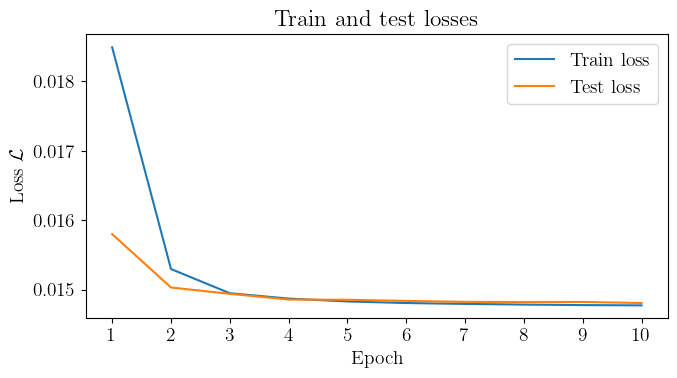

In [10]:
# Instantiate normalizing flow class
lin_regr_flow = NormalizingFlow(input_size=x.shape[1], hidden_size=32, num_layers=7, context_size=y.shape[1])

# Instantiate normalizing flow utilities class
lin_regr_flow_utils = NormalizingFlowUtilities(lin_regr_flow, epochs=10, batch_size=512)

# Train the model
lin_regr_flow_utils.training(x, context=y, savename='appl_ex2_lin_regr_loss.pdf')

#### 2.2.3 Test the trained normalizing flow

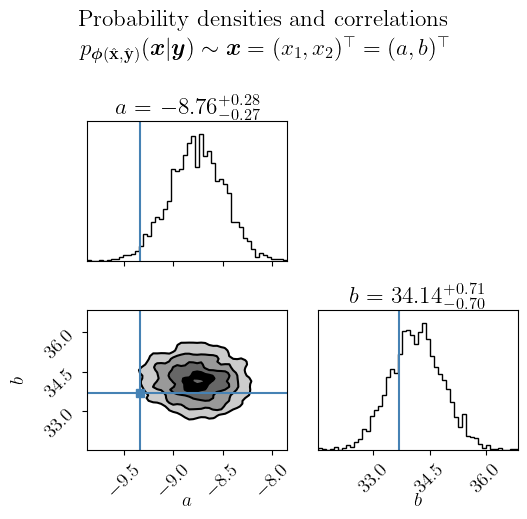

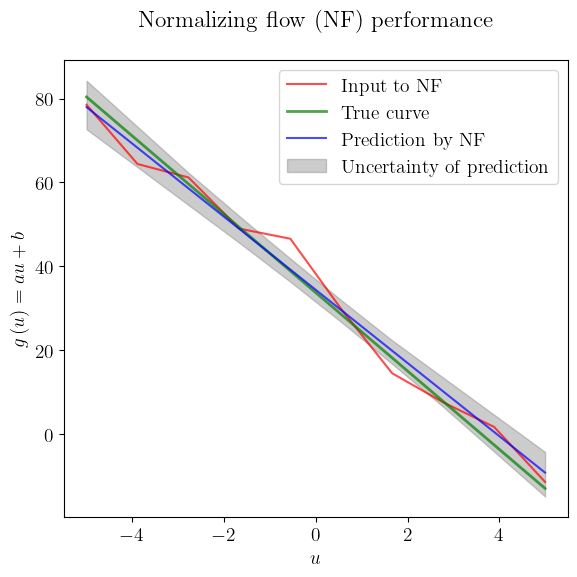

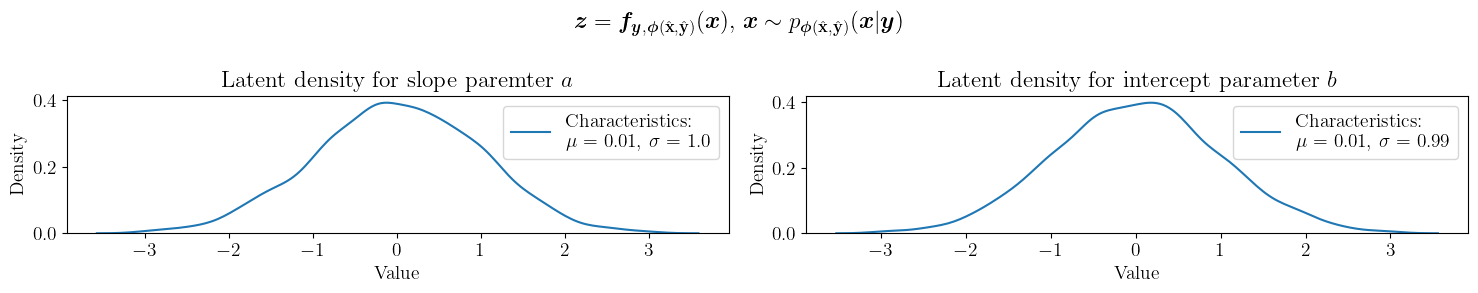

In [14]:
# Define testing parameters probeval
probeval = np.array([-9.34, 33.69]) # probeval[0] is slope parameter, probeval[1] is intercept parameter

# Calculate corresponding context corresponding to testing parameters
probeobs = linear_model(u, probeval[0], probeval[1], 2*noise)

# Sample from the flow
numsamples = 3000
rec_x, z = lin_regr_flow_utils.sample(sample_num=numsamples, context=probeobs)

# Produce corner plot 1
figure = corner.corner(rec_x, labels=['$a$','$b$'], truths=probeval, show_titles=True, plot_datapoints=False, bins=50, fill_contours=True, smooth=1.0)
plt.suptitle('Probability densities and correlations\n$p_{\\bm{\phi}(\\hat{\\mathbf{x}},\\hat{\\mathbf{y}})}(\\bm{x}|\\bm{y}) \\sim \\bm{x} = (x_1,x_2)^\\top = (a,b)^\\top$')
plt.tight_layout()
plt.savefig('appl_ex2_lin_regr_results_1.pdf')

# Extract maximum and minimum values for each point u on the horizontal axis
likeliest_line, max_line, min_line = find_boundaries_affine(rec_x, u)

# Visualize results of the normalizing flow
plt.figure(figsize=(6,6))
plt.title('Normalizing flow (NF) performance\n')
plt.plot(u, probeobs, color='red', label='Input to NF', alpha=0.7)
plt.plot(u, probeval[0]*u + probeval[1], color='green', label='True curve', alpha=0.7, linewidth=2)
plt.plot(u, likeliest_line, color='Blue', label='Prediction by NF', alpha=0.7)
plt.fill_between(u, min_line, max_line, color='Grey', alpha=0.4, label='Uncertainty of prediction')
plt.legend(loc='best')
plt.xlabel('$u$')
plt.ylabel('$g\,(u) = au + b$')
plt.tight_layout()
plt.savefig('appl_ex2_lin_regr_results_2.pdf')

# Propagate it through the inverse normalizing flow
lat_x = lin_regr_flow_utils.sample(sample_num=numsamples, input=rec_x, context=probeobs, inverse=False)

# Plot results
plot_dens(lat_x, lat_x.shape[1], inp_names=['Latent density for slope paremter $a$', 'Latent density for intercept parameter $b$'], title='$\\bm{z} = \\bm{f}_{\\bm{y},\\bm{\phi}(\\hat{\\mathbf{x}},\\hat{\\mathbf{y}})}(\\bm{x})$, $\\bm{x} \\sim p_{\\bm{\phi}(\\hat{\\mathbf{x}},\\hat{\\mathbf{y}})}(\\bm{x}|\\bm{y})$', savename='appl_ex2_lin_regr_results_3.pdf')

# 3. Conclusions

The implementation of an affine coupling layer normalizing flow as characterized above provides a first insight to the architecture of normalizing flows. As one can see from the above examples, normalizing flows work quite fine for relatively simple problems. But as __[[Kobyzev et al., 2019]](https://arxiv.org/abs/1908.09257)__ remark, affine coupling layer normalizing flows are limited in their expressiveness, which makes it necessary that many coupling layers be stacked. But it should be noted, that affine coupling layer normalizing flows - and coupling layer flows in general - allow for the neural networks inferring the coupling layer function parameters to be arbitrarily comples. In the case of the affine coupling layer normalizing flow defined above, this means that the `self.mu_net` and `self.sigma_net` networks of the `CouplingLayer` class can be constructed in an arbitrarily complex manner.

Playing around with the hyperparameters and different training data, the power of affine coupling layer normalizing flows can be explored using this code. A good overview of the present architecture of normalizing flows, aswell as of other flow types can be found in the following references:

- __[[Kobyzev et al., 2019]](https://arxiv.org/abs/1908.09257)__ (Normalizing flows in general)
- __[[Dinh et al., 2017]](https://arxiv.org/abs/1605.08803)__ (Affine coupling layer normalizing flows)
- __[[Durkan et al., 2019]](https://arxiv.org/abs/1906.04032)__ (Affine coupling layer normalizing flows)